### Q-2. Imagine you have a dataset where you have different features like Age ,
Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.
Dataset This is the Dataset You can use this dataset for this question.
https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels

In [82]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, chi2


In [19]:


# Load the dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
data.head(5)





,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [20]:
# Univariate Analysis
# Calculate descriptive statistics
statistics = data.describe()
print("Descriptive Statistics:")
print(statistics)

Descriptive Statistics:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.00

In [8]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [12]:
object_cols = [col for col in data.columns if data[col].dtype == "object"]
print(object_cols)
good_label_cols = [col for col in object_cols if set(data[col]).issubset(set(data[col]))]
good_label_cols.remove('NObeyesdad')

print('Categorical columns that will be  encoded:', good_label_cols)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Categorical columns that will be  encoded: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [22]:
printf = 'Value Unique {}:\n {} \n'

for count, i in enumerate(object_cols):
    val_count = data['{}'.format(i)].value_counts()
    print(count, printf.format(i, val_count))

0 Value Unique Gender:
 Male      1068
Female    1043
Name: Gender, dtype: int64 

1 Value Unique family_history_with_overweight:
 yes    1726
no      385
Name: family_history_with_overweight, dtype: int64 

2 Value Unique FAVC:
 yes    1866
no      245
Name: FAVC, dtype: int64 

3 Value Unique CAEC:
 Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64 

4 Value Unique SMOKE:
 no     2067
yes      44
Name: SMOKE, dtype: int64 

5 Value Unique SCC:
 no     2015
yes      96
Name: SCC, dtype: int64 

6 Value Unique CALC:
 Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64 

7 Value Unique MTRANS:
 Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64 

8 Value Unique NObeyesdad:
 Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_

In [23]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [24]:
data_transform = data.copy()
ordinal_encoder = OrdinalEncoder()
data_transform[good_label_cols] = ordinal_encoder.fit_transform(data_transform[good_label_cols])

In [27]:
dic_to_replace = {"NObeyesdad": {"Insufficient_Weight": 0, 
                          "Normal_Weight": 1,
                         'Overweight_Level_I': 2,
                          'Overweight_Level_II': 3,
                          'Obesity_Type_I': 4,
                          'Obesity_Type_II': 5,
                          'Obesity_Type_III': 6,}
                         }
data_transform.replace(dic_to_replace, inplace=True)

In [28]:
data_transform

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,0.000000,1.000000,3.0,3.0,1
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,2.0,1.0,3.000000,1.0,3.000000,0.000000,2.0,3.0,1
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,2.000000,1.000000,1.0,3.0,1
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,2.0,0.0,2.000000,0.0,2.000000,0.000000,1.0,4.0,2
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,2.0,0.0,2.000000,0.0,0.000000,0.000000,2.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,2.0,0.0,1.728139,0.0,1.676269,0.906247,2.0,3.0,6
2107,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,2.0,0.0,2.005130,0.0,1.341390,0.599270,2.0,3.0,6
2108,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,2.0,0.0,2.054193,0.0,1.414209,0.646288,2.0,3.0,6
2109,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,2.0,0.0,2.852339,0.0,1.139107,0.586035,2.0,3.0,6


C:\Users\0002J0744\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


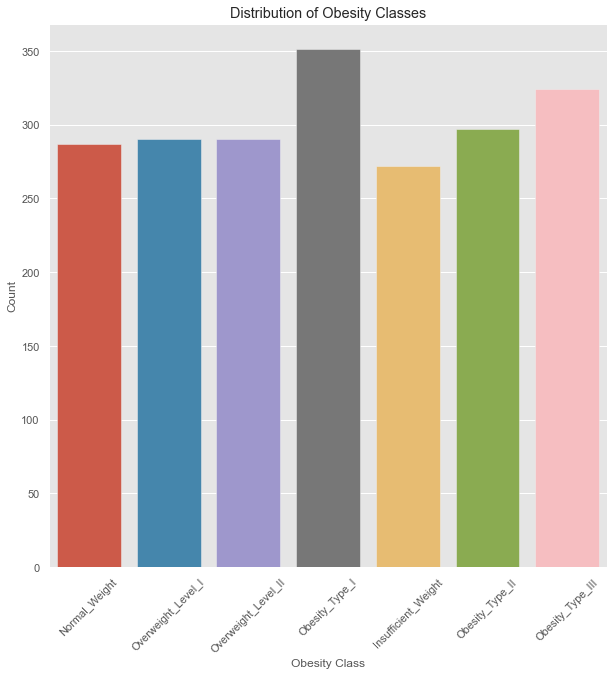

In [29]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 10))
sns.countplot(data['NObeyesdad'])
plt.title('Distribution of Obesity Classes')
plt.xlabel('Obesity Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


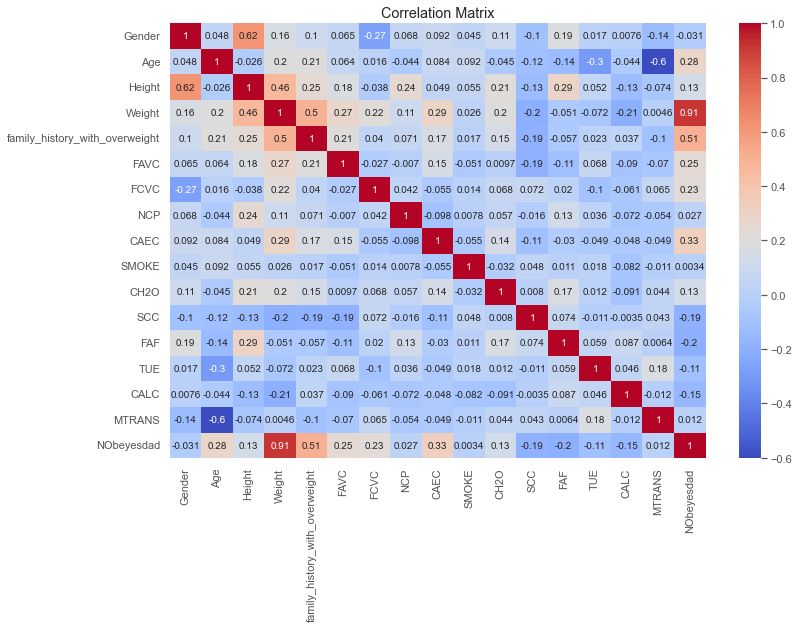

In [31]:
# Multivariate Analysis
correlation_matrix = data_transform.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


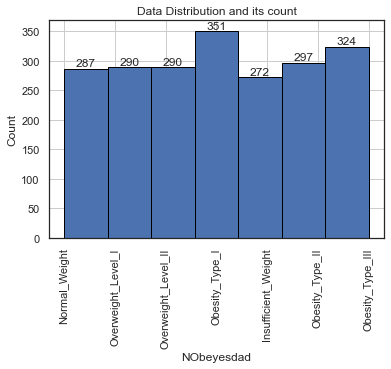

In [44]:


counts, edges, bars = plt.hist(data['NObeyesdad'],edgecolor='black',bins=7)
plt.bar_label(bars)
plt.ylabel('Count')
plt.xlabel('NObeyesdad')
plt.title('Data Distribution and its count')
plt.grid()
plt.xticks(rotation=90)
plt.show()

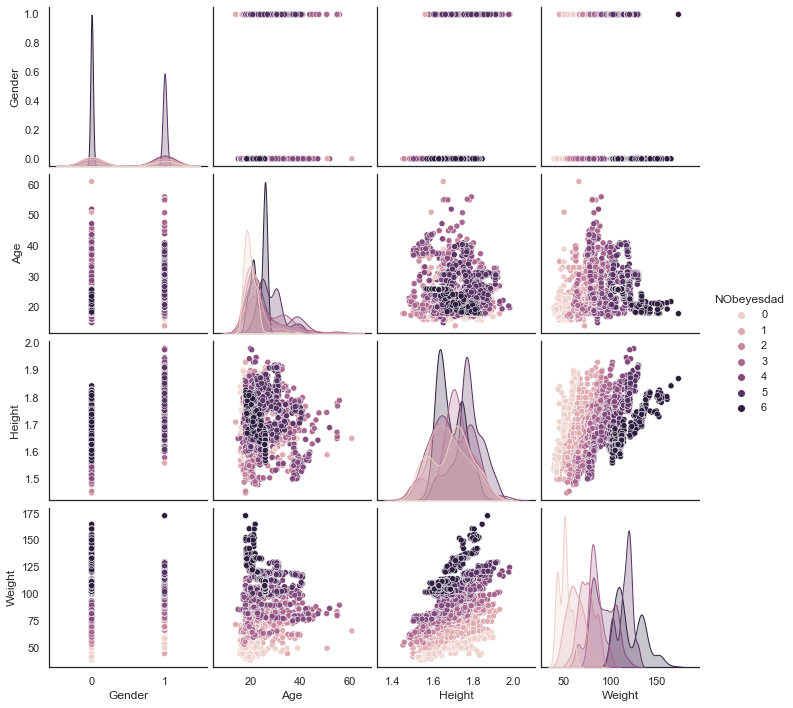

In [40]:
sns.pairplot(data_transform, 
             hue ='NObeyesdad', 
             vars = ['Gender','Age', 
                     'Height', 'Weight'])

In [45]:
# Using groupby() and count()
df2 = data.groupby(['NObeyesdad'])['NObeyesdad'].count()
print(df2)

NObeyesdad
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     290
Overweight_Level_II    290
Name: NObeyesdad, dtype: int64


### Dataset can be considered relatively balanced.

In [49]:
# Select the numeric columns for outlier detection
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'TUE']

# Calculate the IQR for each numeric column
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers in each numeric column
outliers = {}
for col in numeric_cols:
    outliers[col] = data[(data[col] < lower_bound[col]) | (data[col] > upper_bound[col])]

# Print the outliers for each numeric column
for col, outliers_df in outliers.items():
    print(f"Outliers in {col}:")
    print(outliers_df)
    print()

Outliers in Age:
      Gender        Age    Height      Weight family_history_with_overweight  \
13      Male  41.000000  1.800000   99.000000                             no   
21    Female  52.000000  1.690000   87.000000                            yes   
33      Male  39.000000  1.790000   90.000000                             no   
92      Male  55.000000  1.780000   84.000000                            yes   
104   Female  38.000000  1.560000   80.000000                            yes   
...      ...        ...       ...         ...                            ...   
1740    Male  37.765356  1.763582  117.861590                            yes   
1775    Male  37.207082  1.762921  118.401740                            yes   
1776    Male  38.108940  1.752863  119.201465                            yes   
1777    Male  38.644441  1.768235  117.792268                            yes   
1778    Male  38.112989  1.766888  118.134898                            yes   

     FAVC      FCVC   

# Preparing Data Train and Test¶

In [48]:
# Split the data into features (X) and target variable (y)
X = data_transform.drop('NObeyesdad', axis=1)
y = data_transform['NObeyesdad']

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Train the classifier
rf.fit(X, y)

# Get feature importance scores
feature_importance = rf.feature_importances_

# Create a dataframe with feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature importance
print("Feature Importance:")
print(feature_importance_df)

# Set a threshold for selecting relevant features
threshold = 0.05  

# Select relevant features above the threshold
relevant_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].values

# Discard irrelevant features
irrelevant_features = feature_importance_df[feature_importance_df['Importance'] <= threshold]['Feature'].values

print("Relevant Features:")
print(relevant_features)

print("Irrelevant Features:")
print(irrelevant_features)


Feature Importance:
                           Feature  Importance
3                           Weight    0.364013
2                           Height    0.098132
1                              Age    0.090980
6                             FCVC    0.084996
0                           Gender    0.059543
7                              NCP    0.046971
13                             TUE    0.042998
10                            CH2O    0.041432
12                             FAF    0.040345
8                             CAEC    0.031707
4   family_history_with_overweight    0.030092
14                            CALC    0.028332
15                          MTRANS    0.017403
5                             FAVC    0.015874
11                             SCC    0.005131
9                            SMOKE    0.002051
Relevant Features:
['Weight' 'Height' 'Age' 'FCVC' 'Gender']
Irrelevant Features:
['NCP' 'TUE' 'CH2O' 'FAF' 'CAEC' 'family_history_with_overweight' 'CALC'
 'MTRANS' 'FAVC' 'SCC' 'SM

In [54]:
num_cols = [col for col in data.columns if data[col].dtype != "object"]
print(object_cols)
num_cols = [col for col in num_cols if set(data[col]).issubset(set(data[col]))]

print('numerical colums:', num_cols)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
numerical colums: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [52]:
object_cols = [col for col in data.columns if data[col].dtype == "object"]
print(object_cols)


['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [83]:
from sklearn.preprocessing import MinMaxScaler

# Split the data into features (X) and target variable (y)
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']


# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify =y)

# Encode categorical variables (if needed)
# categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
# X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
# X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)


# Apply feature scaling to numerical variables
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Combine the encoded categorical features (if any) and scaled numerical features
# X_train_processed = pd.concat([X_train_encoded, pd.DataFrame(X_train_scaled, columns=numerical_cols)], axis=1)
# X_test_processed = pd.concat([X_test_encoded, pd.DataFrame(X_test_scaled, columns=numerical_cols)], axis=1)



In [84]:
import numpy as np

negative_cols = np.any(X_train_scaled < 0, axis=0)
negative_col_indices = np.where(negative_cols)[0]
print(negative_col_indices)


[]


In [89]:
# Adding below code decreasing the accuracy hence not considering as o now
# Perform feature selection (example with SelectKBest using chi2)
selector = SelectKBest(score_func=chi2, k=5)  # Select the top 5 features 
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
for feature in selected_features:
    print(feature)


Selected Features:
Gender
Height
Weight
family_history_with_overweight
FCVC


In [91]:
# Train the model 
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.9574468085106383
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.84      0.98      0.90        58
     Obesity_Type_I       0.97      0.96      0.96        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       1.00      0.86      0.93        58
Overweight_Level_II       0.92      0.98      0.95        58

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



In [97]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)
# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)



Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy: 0.8723404255319149
Classification Report:
<function classification_report at 0x0000025B9CB3E4C0>


In [98]:
# Print the results
print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)
print("Classification Report:")
print(report)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy: 0.8723404255319149
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.89      0.94        54
      Normal_Weight       0.75      0.91      0.82        58
     Obesity_Type_I       0.86      0.84      0.85        70
    Obesity_Type_II       1.00      0.93      0.97        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.86      0.76      0.81        58
Overweight_Level_II       0.70      0.76      0.73        58

           accuracy                           0.87       423
          macro avg       0.88      0.87      0.87       423
       weighted avg       0.88      0.87      0.87       423



In [99]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB


# Separate the features and target variable
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Encode categorical features
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
label_encoder = LabelEncoder()

encoded_categorical = X[categorical_cols].apply(label_encoder.fit_transform)

# Perform one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
encoded_categorical_onehot = onehot_encoder.fit_transform(encoded_categorical)

# Scale numerical features
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = MinMaxScaler()
scaled_numerical = scaler.fit_transform(X[numerical_cols])

# Combine encoded categorical features and numerical features
X_combined = pd.concat([pd.DataFrame(encoded_categorical_onehot), pd.DataFrame(scaled_numerical)], axis=1)

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_combined, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42,stratify=y)

# Initialize the classifiers with default hyperparameters
random_forest = RandomForestClassifier()
svm = SVC()
gradient_boosting = GradientBoostingClassifier()
nb = GaussianNB()
# Define the hyperparameter grids for each classifier
random_forest_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

gradient_boosting_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 5, 7]
}
nb_params = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}

# Perform grid search with cross-validation to find the best hyperparameters for each classifier
random_forest_grid = GridSearchCV(random_forest, random_forest_params, cv=5)
svm_grid = GridSearchCV(svm, svm_params, cv=5)
gradient_boosting_grid = GridSearchCV(gradient_boosting, gradient_boosting_params, cv=5)
nb_grid = GridSearchCV(nb, nb_params, cv=5)


# Train the models with the best hyperparameters
random_forest_grid.fit(X_train, y_train)
svm_grid.fit(X_train, y_train)
gradient_boosting_grid.fit(X_train, y_train)
nb_grid.fit(X_train, y_train)

# Get the best models with the best hyperparameters
random_forest_best = random_forest_grid.best_estimator_
svm_best = svm_grid.best_estimator_
gradient_boosting_best = gradient_boosting_grid.best_estimator_
nb_best = nb_grid.best_estimator_

# Evaluate the models on the test set
y_pred_rf = random_forest_best.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

y_pred_svm = svm_best.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

y_pred_gb = gradient_boosting_best.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

y_pred_nb = nb_best.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Gradient Boosting Accuracy: {accuracy_nb:.4f}")


Random Forest Accuracy: 0.8936
SVM Accuracy: 0.8014
Gradient Boosting Accuracy: 0.9102
Gradient Boosting Accuracy: 0.5390


In [100]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

y_pred_nb = nb_best.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"nb Boosting Accuracy: {accuracy_nb:.4f}")

Gradient Boosting Accuracy: 0.9102
nb Boosting Accuracy: 0.5390


In [ ]:
# There is  Error in next cells while predicting which has been fixed in below cells. Not running it again as it is time
#consuming to build the model again

In [102]:
#Using stratify and without feature selection
# Split the data into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_combined, y, test_size=0.2, random_state=42,stratify=y)
# Initialize the classifiers with default hyperparameters
random_forest = RandomForestClassifier()
svm = SVC()
gradient_boosting = GradientBoostingClassifier()
nb = GaussianNB()
# Define the hyperparameter grids for each classifier
random_forest_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

gradient_boosting_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 5, 7]
}
nb_params = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}

# Perform grid search with cross-validation to find the best hyperparameters for each classifier
random_forest_grid = GridSearchCV(random_forest, random_forest_params, cv=5)
svm_grid = GridSearchCV(svm, svm_params, cv=5)
gradient_boosting_grid = GridSearchCV(gradient_boosting, gradient_boosting_params, cv=5)
nb_grid = GridSearchCV(nb, nb_params, cv=5)


# Train the models with the best hyperparameters
random_forest_grid.fit(X_train2, y_train2)
svm_grid.fit(X_train2, y_train2)
gradient_boosting_grid.fit(X_train2, y_train2)
nb_grid.fit(X_train2, y_train2)

# Get the best models with the best hyperparameters
random_forest_best = random_forest_grid.best_estimator_
svm_best = svm_grid.best_estimator_
gradient_boosting_best = gradient_boosting_grid.best_estimator_
nb_best = nb_grid.best_estimator_




ValueError: X has 10 features, but RandomForestClassifier is expecting 31 features as input.

# Above Error is irrelevant it has been fised in below cells Not running it again

In [103]:
# Evaluate the models on the test set
y_pred_rf2 = random_forest_best.predict(X_test2)
accuracy_rf = accuracy_score(y_test2, y_pred_rf2)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

y_pred_svm2 = svm_best.predict(X_test2)
accuracy_svm = accuracy_score(y_test2, y_pred_svm2)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

y_pred_gb2 = gradient_boosting_best.predict(X_test2)
accuracy_gb = accuracy_score(y_test2, y_pred_gb2)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

y_pred_nb2 = nb_best.predict(X_test2)
accuracy_nb = accuracy_score(y_test2, y_pred_nb2)
print(f"nb Boosting Accuracy Boosting Accuracy: {accuracy_nb:.4f}")

Random Forest Accuracy: 0.9338
SVM Accuracy: 0.9338
Gradient Boosting Accuracy: 0.9574
nb Boosting Accuracy Boosting Accuracy: 0.5556


# Clearly selecting top 10 feature is decreasing the accuracy of the model we need to experiment more feature selection. However running only with top 5 feature is also giving us good result  with accuracy around 89.5 for Random Forest and 91 for Gradient Boosting. 